In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import sympy as sym
from sympy import init_printing, latex
from matplotlib import cm

pygame 2.1.0 (SDL 2.0.16, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
def b(e,p1,p2,g2): #budget constraint (the curve)
    return e/p1-(p2/p1)*g2
    # t er timer med fritid

def u(a,g1,g2): # utility function
    return g1**(a)*g2**(1-a)

def mrs(a,g1,g2):
    return (a/(1-a))* (g2/g1) #mrs g1/g2 for consumer 1 (dividing marginal utility og g1 by marginal utility of g2)

def i(a,g2,c): # indifference curves for constant utility c
    if a > 0:
        return (c**(1/a)) * (g2**(((a-1)/a))) #return the required g1
    else:
        return 0

def pareto_line(c1_a, c2_a,e1,e2,c1_g1): #only for plotting purposes for c2
    #if all((e1-c1_g1+c1_g1*c)) > 0:
        #return  (e2*c1_g1*c) / (e1-c1_g1+c1_g1*c) # return value of g2 required for pareto optimal outcome for given values of g1
        b = (c2_a/(1-c2_a)) * ((1-c1_a)/(c1_a))
        return  b*e2*c1_g1 / (e1 - c1_g1 +b*c1_g1)
    #else:
        #return 0

def max_cd_with_constraint(a,p1,p2,e): #good1, good2, parameter a, price 1 price 2, endowment, cobb douglas
    g1_level = e*a/p1
    g2_level = e*(1-a)/p2
    return g1_level, g2_level

def pareto_line_mrs(e1,e2,c,c1_g1): #only for plotting purposes for c2
    mrs = (c1_a/(1-c1_a))* (c1_g2/c1_g1)
    
def max_cd_with_constraint(a,p1,p2,e): #good1, good2, parameter a, price 1 price 2, endowment
    g1_level = e*a/p1
    g2_level = e*(1-a)/p2
    return g1_level, g2_level

def indirect_utility(a,good_vector):
    return good_vector[0]**(a)*good_vector[1]**(1-a)

42.10289595351644


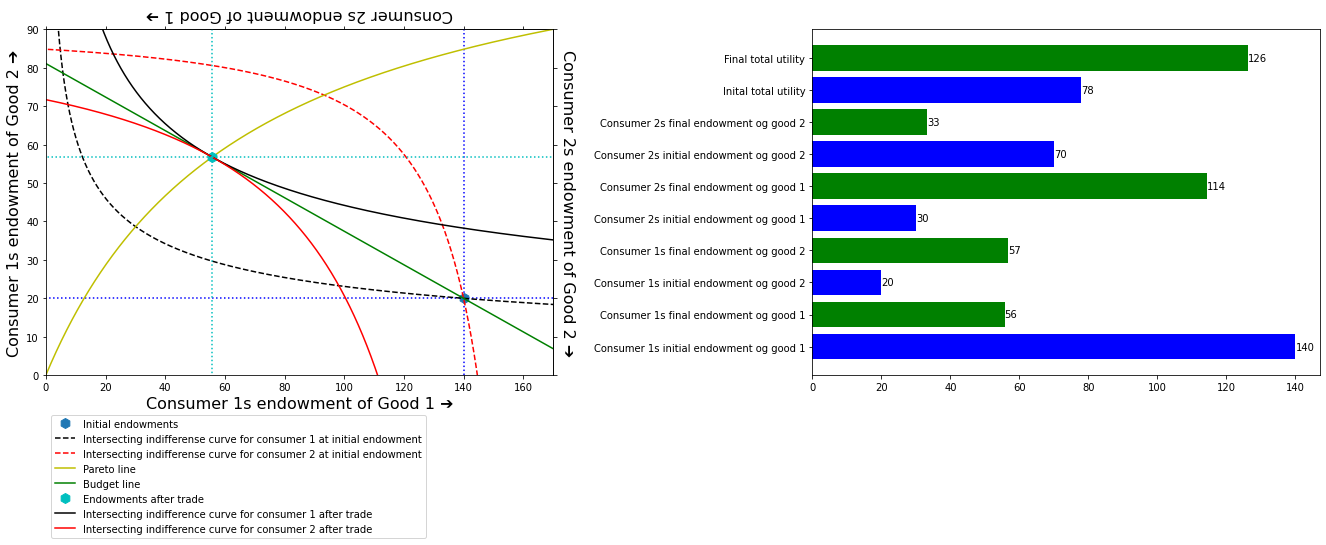

In [4]:
c1_g1 = 140 #consumer 1s endowments of good 1 
c1_g2 = 20 #consumer 1s endowments of good 2

c2_g1 = 30 #consumer 2s endowments of good 1 
c2_g2 = 70 #consumer 2s endowments of good 2

c1_a = 0.3 #cb preferenses with parameter sum = 1, consumer 1s preferanses
c2_a = 0.6 #consumer 2s preferanses

e1, e2 = c1_g1 + c2_g1, c1_g2 + c2_g2 # the total endowments (for simplifying expressions)

#c = (c2_a*(1-c1_a))/((1-c2_a)*c1_a) # calculated value for simplifying expressions

c1_u_int = u(c1_a,c1_g1,c1_g2) # intitial utilities of the consumers
c2_u_int = u(c2_a,c2_g1,c2_g2)
u_tot0 = c1_u_int +c2_u_int

# must be 0<x<1, higher value means stronger preferanse for good 1
# Graph the initial conditions with a few indifferense curves:-----------------------------------------------
fig = plt.figure(2, figsize = [20,14])
#fig.set_figheight(10*(c1_g2 +c2_g2)/(c1_g1 +c2_g1)+3)
#fig.set_figwidth(10*(c1_g1 +c2_g1)/(c1_g2 +c2_g2)+3)
ax1 = fig.add_subplot(221) #first subplot

ax1.set_ylabel("Consumer 1s endowment of Good 2 \u2794" , fontsize=16)
ax1.set_xlabel("Consumer 1s endowment of Good 1 \u2794" , fontsize=16)
ax1.set_xlim([0,(c1_g1 +c2_g1)])
ax1.set_ylim([0,(c1_g2 +c2_g2)])

secax1 = ax1.secondary_xaxis('top')
secax2 = ax1.secondary_yaxis('right')
secax1.set_xticklabels([])
secax2.set_yticklabels([])
secax1.set_xlabel("Consumer 2s endowment of Good 1 \u2794" , fontsize=16, rotation=180)
secax2.set_ylabel("Consumer 2s endowment of Good 2 \u2794" , fontsize=16, rotation=270, labelpad=15)
#plot lines showing initial endowments
plt.plot([c1_g1,0],[c1_g2,c1_g2], 'b:',[c1_g1,c1_g1],[c1_g2,0], 'b:',[c1_g1+c2_g1,c1_g1],[c1_g2,c1_g2], 'b:',[c1_g1,c1_g1],[c1_g2+c2_g2,c1_g2], 'b:') #plots points [1x,2x] [1y,2y]
#plot a marker and some text at the point of the initial endowments
plt.plot(c1_g1, c1_g2, "h", markersize=10, label = "Initial endowments")
#The figure should plot some indifferense curves for the two consumers around the point of the initial endowments
#This is achieved by plotting the requiered values of g1 for any values og g2, using the "i" function above
v1 = np.arange(0.1, max(e2,e1) ,0.1) #setting up a series of values for g2 to calculate required g1
plt.plot(i(c1_a,v1,c1_u_int),v1, 'k--', label = "Intersecting indifferense curve for consumer 1 at initial endowment") 
#similar for c2. this must be plotted in relation to the other axis. For this, insted of the value stream for g2, the total amount of g2 minus the value from the stream is plotted
# against the total og g1 minus the required g1 for contant utility for consumer 2. Thus inversing the plot for c2 as his endowments are exactly the totalts minus c1s endowments. 
#plt.plot((c1_g2 +c2_g2)-v1, (c1_g1 +c2_g1)-i(c2_a,v1,c2_u_int), 'r--')
plt.plot(e1-i(c2_a,v1,c2_u_int), e2-v1,'r--', label = "Intersecting indifferense curve for consumer 2 at initial endowment")
print(c2_u_int)
# What is the optimal outcome if trading is possible? Intersection of indifference curves indicates that better options are available
# at optimum the mrs's between the two goods should equal for the two consumers if we have an interior soultion. For cobb douglas utility this implies 
#c1_g2/c1_g1 = c2_g2/c2_g1 *(c2_a*(1-c1_a))/((1-c2_a)*c1_a), with four unknowns. substituting for the total endowmenst e1 == c1_g1 +c2_g1, e2 == c1_g2 +c2_g2:
#c1_g2/c1_g1 = (e-c1_g2)/(e-c1_g1) *(c2_a*(1-c1_a))/((1-c2_a)*c1_a)
#c1_g2/c1_g1 = (e-c1_g2)/(e-c1_g1) *c
#the condition is satisfied for c1_g2 = (e2*c1_g1*c) / (e1-c1_g1+c1_g1*c), this is implemented in the pareto_line function
v2 = np.arange(0.1, e1 ,0.1) #setting up a series of values for g1 to calculate required g2 for pareto optimality
plt.plot(v2, pareto_line(c1_a,c2_a,e1,e2,v2), 'y', label = "Pareto line")
#the common tangent of the two indifference curves along the pareto-line can eb interpeted as relative free-market prices for the two goods.
#these tangent can be drawn as budget lines in the diagram denoting a direction of trade eading towards equilibrium
#mrs = mrs for the two consumers along the pareto line. Finding one such mrs for one point along the pareto curve gives a likely direction of trade
#mrs might change as the composition of goods do so the consumers are allowed to trade a total of 10 times, approaching the equilibrium:
c1_good_vector = [c1_g1, c1_g2] #start by finding mrs along pareto line at initial level og good 1 for c1
for j in range(19):
    mrs_eq = mrs(c1_a,c1_good_vector[0],pareto_line(c1_a,c2_a,e1,e2,c1_good_vector[0])) #calculating mrs at initial or resulting good vector for c1
    income_c1 = c1_g1*mrs_eq + c1_g2 # optimization for c1 with income and relative prices
    c1_good_vector = max_cd_with_constraint(c1_a,mrs_eq,1,income_c1)


v3 = np.arange(0.1, e1 ,0.1) #values of gi for as x values to plot
plt.plot(v3, c1_g2 + (c1_g1-v3)*mrs_eq, 'g', label = "Budget line")
plt.plot(c1_good_vector[0], c1_good_vector[1], "h", markersize=10, label =  "Endowments after trade", color = 'c')

u_tot1 = u(c1_a,c1_good_vector[0],c1_good_vector[1]) + u(c2_a,e1-c1_good_vector[0],e2-c1_good_vector[1])

#finally draw indifference curves through the equilibrium point:
plt.plot(i(c1_a,v1,u(c1_a,c1_good_vector[0],c1_good_vector[1])),v1, 'k', label = "Intersecting indifference curve for consumer 1 after trade") 
plt.plot(e1-i(c2_a,v1,u(c2_a,e1-c1_good_vector[0],e2-c1_good_vector[1])), e2-v1,'r',  label = "Intersecting indifference curve for consumer 2 after trade")
a1, a2, b1, b2 = c1_good_vector[0], c1_good_vector[1], e1- c1_good_vector[0],e2 - c1_good_vector[1]
plt.plot([a1,0],[a2,a2], 'c:',[a1,a1],[a2,0], 'c:',[a1,e1],[a2,a2], 'c:',[a1,a1],[e2,a2], 'c:') #endowment lines

#box = ax1.get_position()
#ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.1))

#adding subplot for summary results
ax2 = fig.add_subplot(222) #second subplot
#Example found at https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
data = {'Consumer 1s initial endowment og good 1':c1_g1, 'Consumer 1s final endowment og good 1':a1, 
        'Consumer 1s initial endowment og good 2':c1_g2, 'Consumer 1s final endowment og good 2':a2,
        'Consumer 2s initial endowment og good 1':c2_g1, 'Consumer 2s final endowment og good 1':b1,
        'Consumer 2s initial endowment og good 2':c2_g2, 'Consumer 2s final endowment og good 2':b2,
        'Inital total utility':u_tot0, 'Final total utility':u_tot1}
values = list(data.values())
labels = list(data.keys())
colorlist = ('b','g','b','g','b','g','b','g','b','g')

r = ax2.barh(labels, values, color = colorlist)
ax2.bar_label(r, fmt='%.0f')
box = ax2.get_position()
ax2.set_position([box.x0*1.2, box.y0, box.width , box.height])
